# <b>1 <span style='color:#4285f4'>|</span> Setup</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries
- **For ML Models**: sklearn  
- **For Data Processing**: numpy, pandas, sklearn  
- **For Data Visualization**: matplotlib, seaborn, plotly  

In [ ]:
# For ML models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, recall_score,precision_score
from sklearn.model_selection import GridSearchCV

# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Miscellaneous
import os
import random

## Setting up sklearnex to speed up training
If you don't know about sklearnex, this is a tool you can use to speed up training sklearn models, without having to change any code.  
A simple 2 line of code can speed up training by 2x.  
You can follow [this notebook by Devlikamov Vlad](https://www.kaggle.com/code/lordozvlad/let-s-speed-up-your-kernels-using-sklearnex) to learn more about it

In [ ]:
# from sklearnex import patch_sklearn
# patch_sklearn()

# <b>2 <span style='color:#4285f4'>|</span> About the Dataset</b>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PRML/Project Drive/stroke_data.csv')
del df['id']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Column Descriptions
- `id`: unique identifier
- `gender`: "Male", "Female" or "Other"
- `age`: age of the patient
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- `ever_married`: "No" or "Yes"
- `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- `Residence_type`: "Rural" or "Urban"
- `avg_glucose_level`: average glucose level in blood
- `bmi`: body mass index
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- `stroke`: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in `smoking_status` means that the information is unavailable for this patient

Categorical Features  
`gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`  
Continuous Features  
`age`, `avg_glucose_level`, `bmi`  

I will replace all `0` as `No` and all `1` as `Yes` for now, for visualization purposes in the EDA section of this notebook

In [ ]:
for col in ['hypertension', 'heart_disease', 'stroke']:
    df[col] = df[col].apply(lambda x: {0:'No', 1:'Yes'}[x])

## Missing Values Visualization

In [ ]:
fig = px.imshow(df.isna().transpose(),color_continuous_scale="Blues")
fig.show()

#### Only `bmi` has *some* missing values. So, to keep things simple, I will delete the rows that contains those missing values.

In [ ]:
df = df[df['bmi'].notna()]

In [ ]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.817073,0,1,1,1,0.841577,0.375000,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0.975610,0,1,1,0,0.389784,0.332992,1,0,1,0,0,0,1,0,0,0,0,1,0
3,0.597561,0,0,1,1,0.630124,0.352459,1,1,0,0,0,0,1,0,0,0,0,0,1
4,0.963415,1,0,1,0,0.640760,0.245902,1,1,0,0,0,0,0,1,0,0,0,1,0
5,0.987805,0,0,1,1,0.685251,0.297131,1,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.158537,0,0,0,0,0.379333,0.190574,0,1,0,0,0,0,0,0,1,1,0,0,0
5106,0.987805,0,0,1,1,0.460735,0.409836,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,0.426829,0,0,1,0,0.305402,0.313525,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,0.621951,0,0,1,0,0.611945,0.262295,0,0,1,0,0,0,1,0,0,0,1,0,0


## Column Statistics (of numerical data)

In [ ]:
df.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.522748,0.091872,0.049501,0.652679,0.507232,0.387522,0.296037,0.042575,0.590141,0.409656,0.000204,0.128336,0.004482,0.572622,0.157873,0.136688,0.302098,0.170503,0.377266,0.150132
std,0.275062,0.288875,0.216934,0.476167,0.499999,0.163481,0.080472,0.201917,0.491858,0.491820,0.014273,0.334497,0.066801,0.494748,0.364659,0.343552,0.459214,0.376113,0.484752,0.357238
min,0.000976,0.000000,0.000000,0.000000,0.000000,0.202841,0.105533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304878,0.000000,0.000000,0.000000,0.000000,0.283617,0.240779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.536585,0.000000,0.000000,1.000000,1.000000,0.337381,0.287910,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.731707,0.000000,0.000000,1.000000,1.000000,0.417936,0.339139,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe()[1:][['age','avg_glucose_level','bmi']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
age,42.865374,22.555115,0.080000,25.000000,44.000000,60.000000,82.000000
avg_glucose_level,105.305150,44.424341,55.120000,77.070000,91.680000,113.570000,271.740000
bmi,28.893237,7.854067,10.300000,23.500000,28.100000,33.100000,97.600000


## Column Statistics (of categorical data)

<span style='color:#4285f4'>|</span> Data Cleaning</b>

<h2>4.1 <span style='color:#4285f4'>|</span> Normalizing Continuous Features</h2>  

In [ ]:
df.describe()[['age','avg_glucose_level', 'bmi']].T[['min', 'max']].style.background_gradient(cmap='Blues')

,min,max
age,0.080000,82.000000
avg_glucose_level,55.120000,271.740000
bmi,10.300000,97.600000


These continuous have different ranges, so I am normalizing them to be between 0 and 1

In [ ]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    df[col] = df[col]/df[col].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<h2>4.2 <span style='color:#4285f4'>|</span> Encoding Categorical Features</h2>  

In [ ]:
print('\nCategorical Columns\n')
df.select_dtypes(include=['O']).nunique()


Categorical Columns



gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
stroke            2
dtype: int64

Some categorical columns have 2 unique values, and some have more than 2 unique values.  
Here, I will convert the columns with 2 unique values to binary (either 1 or 0)  
And one-hot encode the other categorical columns which has more than 2 unique values  

In [ ]:
# Integer encode columns with 2 unique values
for col in ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(df, columns=['gender', 'work_type', 'smoking_status'], prefix = ['gender', 'work_type', 'smoking_status'])
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.817073,0,1,1,1,0.841577,0.375000,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0.975610,0,1,1,0,0.389784,0.332992,1,0,1,0,0,0,1,0,0,0,0,1,0
3,0.597561,0,0,1,1,0.630124,0.352459,1,1,0,0,0,0,1,0,0,0,0,0,1
4,0.963415,1,0,1,0,0.640760,0.245902,1,1,0,0,0,0,0,1,0,0,0,1,0
5,0.987805,0,0,1,1,0.685251,0.297131,1,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   ever_married                    4909 non-null   int64  
 4   Residence_type                  4909 non-null   int64  
 5   avg_glucose_level               4909 non-null   float64
 6   bmi                             4909 non-null   float64
 7   stroke                          4909 non-null   int64  
 8   gender_Female                   4909 non-null   uint8  
 9   gender_Male                     4909 non-null   uint8  
 10  gender_Other                    4909 non-null   uint8  
 11  work_type_Govt_job              4909 non-null   uint8  
 12  work_type_Never_worked          49

<h2>4.3 <span style='color:#4285f4'>|</span> Train-Val Split</h2>  

In [ ]:
features = np.array(df[[col for col in df.columns if col!='stroke']])
labels = np.array(df['stroke'])

x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=0)

# <b>5 <span style='color:#4285f4'>|</span> Models</b>

# Logistic Regression from scratch

In [ ]:
model_comparison = {}

In [ ]:
y_train = y_train.reshape((y_train.shape[0],1))

In [ ]:
# Logistic Regression
class my_LR:

  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def fit(self,X,y,learning_rate,iterations):
    n_samples,n_features = X.shape
    weights = np.zeros((n_features,1))
    # print(weights.shape)
    bias=0
    costs=[]
    for _ in range(iterations):
      z=np.dot(X,weights)+bias # 3927x1 
      y_predicted=self.sigmoid(z)
      # print("y ",y.shape)
      # print("y_pred ",y_predicted.shape)
      dw=(1/n_samples)*(np.dot(X.T,y_predicted-y))
      db=(1/n_samples)*np.sum(y_predicted-y)

      cost_i = (-1/n_samples)*(np.sum(y.T*np.log(y_predicted) + (1-y.T)*(np.log(1-y_predicted))))
      costs.append(cost_i)

      # if(_%100==0):
      #   print(cost_i)

      weights = weights - learning_rate*dw
      bias = bias - learning_rate*db
      # print(weights.shape)

    return weights,bias,costs

  def predict(self,X,weights,bias):
    #print(X)
    z=np.dot(X,weights)+bias
    #print(z)
    y_predicted=self.sigmoid(z)
    #print(y_predicted) #all coming out to 1
    #y_predicted_cls = np.zeros((X.shape[0],weights.shape[1]))

    y_predicted_cls = [1 if i>=0.5 else 0 for i in y_predicted]
    
    # for i in y_predicted:
    #   if i>=0.5:
    #     y_predicted_cls=1
    #   else:
    #     y_predicted_cls=0
    return y_predicted_cls

  # def accuracy_score(y_true,y_pred):
  #   return np.sum(y_true==y_pred)/len(y_true)

  def normalize(self,X):
      m, n = X.shape
      for i in range(n):
          X = (X - X.mean(axis=0))/X.std(axis=0)
      return X

In [ ]:
my_model_LR = my_LR()
weights,bias,costs = my_model_LR.fit(x_train,y_train,learning_rate=0.1,iterations=10)
y_pred_lr = my_model_LR.predict(x_val,weights,bias)
# print("Accuracy: ",accuracy_score(y_test,y_pred_lr))

from sklearn import metrics
print("Scratch Coded function's Accuracy:",metrics.accuracy_score(y_val,y_pred_lr))
cnf_matrix = metrics.confusion_matrix(y_val, y_pred_lr)
print('\nConfusion Matrix: \n',cnf_matrix)

model_comparison['LogisticRegression'] = [precision_score(y_val,y_pred_lr,average='weighted'),recall_score(y_val,y_pred_lr,average='weighted'), f1_score(y_val,y_pred_lr, average='weighted'),accuracy_score(y_val,y_pred_lr)]
print('\n')
print(classification_report(y_val,y_pred_lr, zero_division=1, digits=3))

Scratch Coded function's Accuracy: 0.9562118126272913

Confusion Matrix: 
 [[939   0]
 [ 43   0]]


              precision    recall  f1-score   support

           0      0.956     1.000     0.978       939
           1      1.000     0.000     0.000        43

    accuracy                          0.956       982
   macro avg      0.978     0.500     0.489       982
weighted avg      0.958     0.956     0.935       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



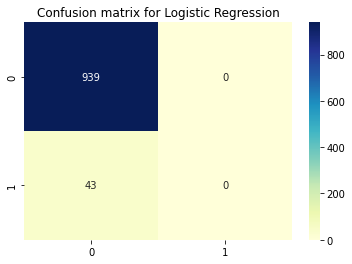

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_lr)
ax = plt.axes()
f = sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu")
ax.set_title('Confusion matrix for Logistic Regression')
plt.show()

# Logistic Regression sklearn

In [ ]:
# # import the class
# from sklearn.linear_model import LogisticRegression

# # instantiate the model (using the default parameters)
# logreg = LogisticRegression()

# # fit the model with data
# logreg.fit(x_train,y_train)

# #
# y_pred=logreg.predict(x_val)

# # import the metrics class
# from sklearn import metrics
# cnf_matrix = metrics.confusion_matrix(y_val, y_pred)

# print("sk-learn's Accuracy:",metrics.accuracy_score(y_val, y_pred))
# print('\nConfusion Matrix: \n',cnf_matrix)



In [ ]:
# #Import Gaussian Naive Bayes model
# from sklearn.naive_bayes import GaussianNB

# #Create a Gaussian Classifier
# model = GaussianNB()

# # Train the model using the training sets
# model.fit(x_train,y_train)

# #Predict Output
# predicted= model.predict(x_val) 

# from sklearn import metrics
# cnf_matrix = metrics.confusion_matrix(y_val, predicted)

# print("sk-learn's Accuracy:",metrics.accuracy_score(y_val, predicted))
# print('\nConfusion Matrix: \n',cnf_matrix)


<h2>5.1 <span style='color:#4285f4'>|</span> SVC</h2>  

In [ ]:
parameters = {'C': [1,2,3,4,5,6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC()

clf = GridSearchCV(svc_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train.reshape((y_train.shape[0],)))
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred_svc = clf.predict(x_val)
model_comparison['SVC'] =  [precision_score(y_val,y_pred_svc,average='weighted'),recall_score(y_val,y_pred_svc,average='weighted'), f1_score(y_val,y_pred_svc, average='weighted'),accuracy_score(y_val,y_pred_svc)]
print('\n')
print(classification_report(y_val,y_pred_svc, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}


              precision    recall  f1-score   support

           0      0.956     1.000     0.978       939
           1      1.000     0.000     0.000        43

    accuracy                          0.956       982
   macro avg      0.978     0.500     0.489       982
weighted avg      0.958     0.956     0.935       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



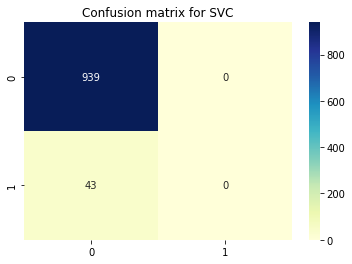

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_svc)
ax = plt.axes()
f = sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu")
ax.set_title('Confusion matrix for SVC')
plt.show()

<h2>5.2 <span style='color:#4285f4'>|</span> DecisionTreeClassifier</h2>  

# DecisionTree from Scratch

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(x_train,y_train)
classifier.print_tree()

X_0 <= 0.8170731707317073 ? 0.005042843026127869
 left:X_0 <= 0.5365853658536586 ? 0.0009253184721905588
  left:X_5 <= 0.213770515934349 ? 6.429606790752697e-05
    left:X_5 <= 0.21351291675866638 ? 0.03499236483163819
        left:0.0
        right:1.0
    right:X_13 <= 0.0 ? 2.863771331828094e-05
        left:0.0
        right:0.0
  right:X_2 <= 0.0 ? 0.0010769857242047542
    left:X_5 <= 0.6290203871347612 ? 0.000406359678663884
        left:0.0
        right:0.0
    right:X_6 <= 0.3657786885245902 ? 0.022927083418576577
        left:0.0
        right:0.0
 right:X_5 <= 0.47828806947817765 ? 0.007115921657177282
  left:X_6 <= 0.2520491803278689 ? 0.004710619835998187
    left:X_6 <= 0.24487704918032788 ? 0.017063597238524353
        left:0.0
        right:0.0
    right:X_17 <= 0.0 ? 0.005001324351772057
        left:0.0
        right:0.0
  right:X_5 <= 0.4835872525207919 ? 0.016950010377841718
    left:1.0
    right:X_6 <= 0.26331967213114754 ? 0.007343249641623417
        left:0.0
 

In [ ]:
y_pred_decisiontree = classifier.predict(x_val) 

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_pred_decisiontree)

print("sk-learn's Accuracy:",metrics.accuracy_score(y_val, y_pred_decisiontree))
print('\nConfusion Matrix: \n',cnf_matrix)

model_comparison['DecisionTree'] =  [precision_score(y_val,y_pred_decisiontree,average='weighted'),recall_score(y_val,y_pred_decisiontree,average='weighted'), f1_score(y_val,y_pred_decisiontree, average='weighted'),accuracy_score(y_val,y_pred_decisiontree)]
print('\n')
print(classification_report(y_val,y_pred_decisiontree, zero_division=1, digits=3))

sk-learn's Accuracy: 0.9541751527494908

Confusion Matrix: 
 [[937   2]
 [ 43   0]]


              precision    recall  f1-score   support

           0      0.956     0.998     0.977       939
           1      0.000     0.000     0.000        43

    accuracy                          0.954       982
   macro avg      0.478     0.499     0.488       982
weighted avg      0.914     0.954     0.934       982



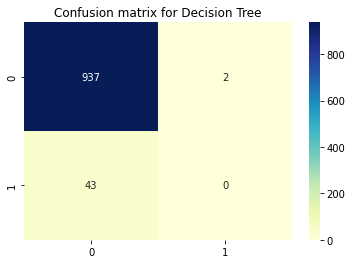

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_decisiontree)
ax = plt.axes()
f = sns.heatmap(cm, annot=True, fmt='g',cmap="YlGnBu")
ax.set_title('Confusion matrix for Decision Tree')
plt.show()

<h2>5.3 <span style='color:#4285f4'>|</span> KNeighborsClassifier</h2>  

In [ ]:
parameters = {'n_neighbors': [5,10,15,20]}

K_model = KNeighborsClassifier()

clf = GridSearchCV(K_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train.reshape((y_train.shape[0],1)))
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_val)
model_comparison['KNeighborsClassifier'] =  [precision_score(y_val,y_pred,average='weighted'),recall_score(y_val,y_pred,average='weighted'), f1_score(y_val,y_pred, average='weighted'),accuracy_score(y_val,y_pred)]
print('\n')
print(classification_report(y_val,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/n

Best Hyperparameters: {'n_neighbors': 10}


              precision    recall  f1-score   support

           0      0.956     0.999     0.977       939
           1      0.000     0.000     0.000        43

    accuracy                          0.955       982
   macro avg      0.478     0.499     0.489       982
weighted avg      0.914     0.955     0.934       982



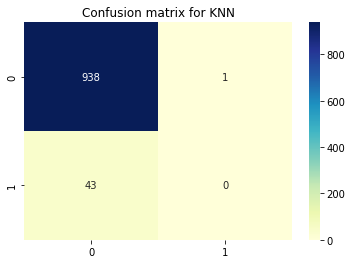

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_val,y_pred)
ax = plt.axes()
f = sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu")
ax.set_title('Confusion matrix for KNN')
plt.show()

<h2>5.6 <span style='color:#4285f4'>|</span> Model Comparison</h2>  

In [ ]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
print(model_comparison_df.info)
model_comparison_df.columns = ['Precision','Recall','F1-score','Accuracy']
model_comparison_df = model_comparison_df.sort_values('Recall', ascending=True)
model_comparison_df.style.background_gradient(cmap='Blues')


<bound method DataFrame.info of                              0         1         2         3
LogisticRegression    0.914341  0.956212  0.934808  0.956212
SVC                   0.914341  0.956212  0.934808  0.956212
DecisionTree          0.914256  0.954175  0.933789  0.954175
KNeighborsClassifier  0.914298  0.955193  0.934299  0.955193>


,Precision,Recall,F1-score,Accuracy
DecisionTree,0.914256,0.954175,0.933789,0.954175
KNeighborsClassifier,0.914298,0.955193,0.934299,0.955193
LogisticRegression,0.914341,0.956212,0.934808,0.956212
SVC,0.914341,0.956212,0.934808,0.956212
